In [1]:
################################################################################
#  Purpose: Identify a claim can be fast-tracked using Machine learning.
#  Created by: Suriya Mohan
#  Created on: 12-Nov-2016
################################################################################

# Import python - scikit-learn machine learning packages.
import numpy as np;
import pandas as pd;
from pandas import Series,DataFrame;
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import Pipeline
%matplotlib inline

In [2]:
# Load the data in CSV file into panda dataframe.
df_claims = pd.read_csv('owning_adjuster_ml.csv')


In [3]:
def claim_labelEncode(df,column_name):
    '''
    Purpose: Function used to convert the nominal features (fields with string values) to integer values
    Input: Dataframe and column name to encode
    Output: Modify the passed dataframe by adding encoded field to end and drop the original field.
    '''
    df[column_name].fillna(value=df[column_name].value_counts().idxmax(), inplace=True)
    
    le = LabelEncoder()
    encoder = le.fit_transform(df[column_name].values)
    df.insert(0,'code' + column_name,encoder.astype(int))
    df.drop(column_name,axis=1,inplace=True)

In [4]:
def claim_oneHotEncode(df,column_array):
    '''
    Purpose: Function used to hot encode fields - example field having 3 distinct values converted to three columns
    Input: Dataframe and column array 
    Output: Returns the data frame with encoded values.
    '''
    ohe = OneHotEncoder(categorical_features=column_array,sparse=False)
    df_ohe = ohe.fit_transform(df)
    return df_ohe

In [5]:
def claim_standardScaler(df):
    '''
    Purpose: Normalize the dataframe so the features are on the same scale.
    Input: Dataframe
    Output: Returns the data frame with standarized values.
    '''
    sc = StandardScaler()
    df_std = sc.fit_transform(df)
    return df_std

In [6]:
def claim_Imputer(df):
    '''
    Purpose: Normalize the dataframe so the features are on the same scale.
    Input: Dataframe
    Output: Returns the data frame with standarized values.
    '''
    imr = Imputer(missing_values=np.NaN, strategy='most_frequent',axis=0)
    imr = imr.fit_transform(df)
    return imr

In [7]:
# Display all the fields in the input dataframe.
df_claims.columns

Index(['CLAIM_NUM', 'CASUALTY_UNIT_IND', 'FATALITY_IND',
       'HIGH_VALUE_CLAIM_IND', 'ACCIDENT_FAULT_IND', 'LEGAL_ENTITY_NM',
       'WEATHER_CD_DESC', 'CLAIM_JURISDICTION_ST_CD_DESC', 'LOSS_TYPE_CD_DESC',
       'CLAIM_COMPLEXITY_CD_DESC', 'CLAIM_FILE_TYPE_DESC',
       'CLAIM_TIER_CD_DESC', 'FAULT_RATING_CD_DESC', 'CATASTROPHE_IND',
       'LOSS_SUB_TYPE_DESC', 'LIABILITY_CD_DESC', 'LIABILITY_PERCENTAGE',
       'INCIDENT_ONLY_IND', 'GLASS_ONLY_IND', 'NON_CHARGEABLE_CLAIM_IND',
       'TOTAL_LOSS_IND', 'PRODUCT_TYPE_DESC', 'ATTORNEY_ON_CLAIM_IND',
       'VEHICLE_TOW_STORAGE_IND', 'COVERAGE_TYPE_CD_DESC', 'TOW_TYPE_CD_DESC',
       'INCIDENT_TYPE_CD_DESC', 'COVERAGE_SUB_TYPE_CD_DESC', 'CLAIM_TYPE_DESC',
       'COVERAGE_NM', 'PROPERTY_DESC', 'DAMAGE_DESC', 'VEH_COUNT',
       'CLAIM_ADJUSTER_GROUP_TYPE'],
      dtype='object')

In [8]:
# Check value and count of each value in all the fields in the dataframe.
for col in df_claims.columns:
    if col in ['CLAIM_NUM']:
        continue
    
    print(col)
    value_cnt = df_claims[col].value_counts()
    print(value_cnt)
    print('************')

CASUALTY_UNIT_IND
Y    41252
Name: CASUALTY_UNIT_IND, dtype: int64
************
FATALITY_IND
Y    41252
Name: FATALITY_IND, dtype: int64
************
HIGH_VALUE_CLAIM_IND
Y    41252
Name: HIGH_VALUE_CLAIM_IND, dtype: int64
************
ACCIDENT_FAULT_IND
Y    21542
N    19710
Name: ACCIDENT_FAULT_IND, dtype: int64
************
LEGAL_ENTITY_NM
CSIIB       37782
4WUIC        2919
1MWIC         318
kico_AAA      157
1MAIC          55
1MANJ          21
Name: LEGAL_ENTITY_NM, dtype: int64
************
WEATHER_CD_DESC
NOCODEID    40962
CLEAR         212
RAIN           33
WIND           21
HAIL           21
SNOW            2
FOG             1
Name: WEATHER_CD_DESC, dtype: int64
************
CLAIM_JURISDICTION_ST_CD_DESC
CALIFORNIA              38100
NEVADA                    846
UTAH                      261
OREGON                    259
OKLAHOMA                  235
ARIZONA                   222
COLORADO                  167
NEW JERSEY                157
MARYLAND                  120
PENNSYL

In [9]:
# Move the target field to array.['CLAIM_NUM','CLAIM_ADJUSTER_GROUP_TYPE']
df_target = df_claims[['CLAIM_NUM','CLAIM_ADJUSTER_GROUP_TYPE']]

df_target.groupby('CLAIM_ADJUSTER_GROUP_TYPE').count()

,CLAIM_NUM
CLAIM_ADJUSTER_GROUP_TYPE,
Complex_Team,7181
Dispatch,6297
EIR_Backup,3047
EIR_Team,9616
FNOL,4089
Fast_Track,11022


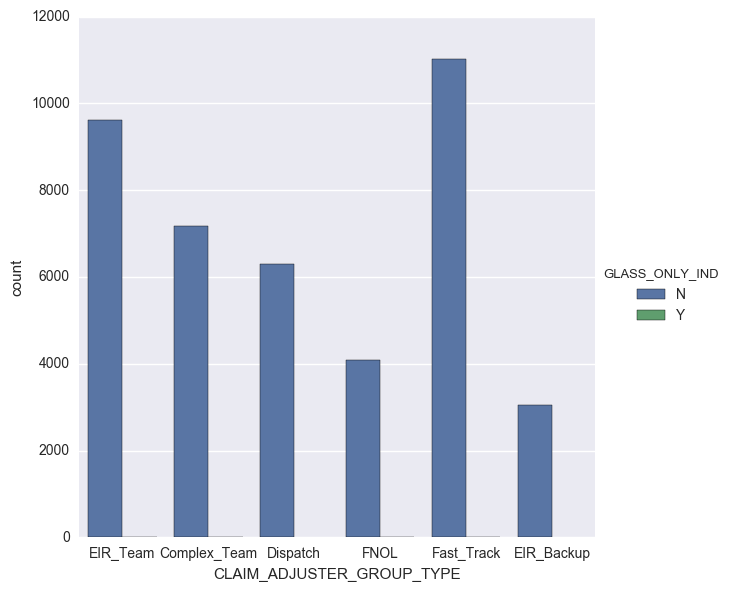

In [10]:
# Plot the glass only indicator and claim adjuster group.
df_report = df_claims[df_claims['CLAIM_ADJUSTER_GROUP_TYPE'] != 'FNOL']

sns.factorplot('CLAIM_ADJUSTER_GROUP_TYPE',data=df_claims,hue='GLASS_ONLY_IND' ,kind='count',size=6)

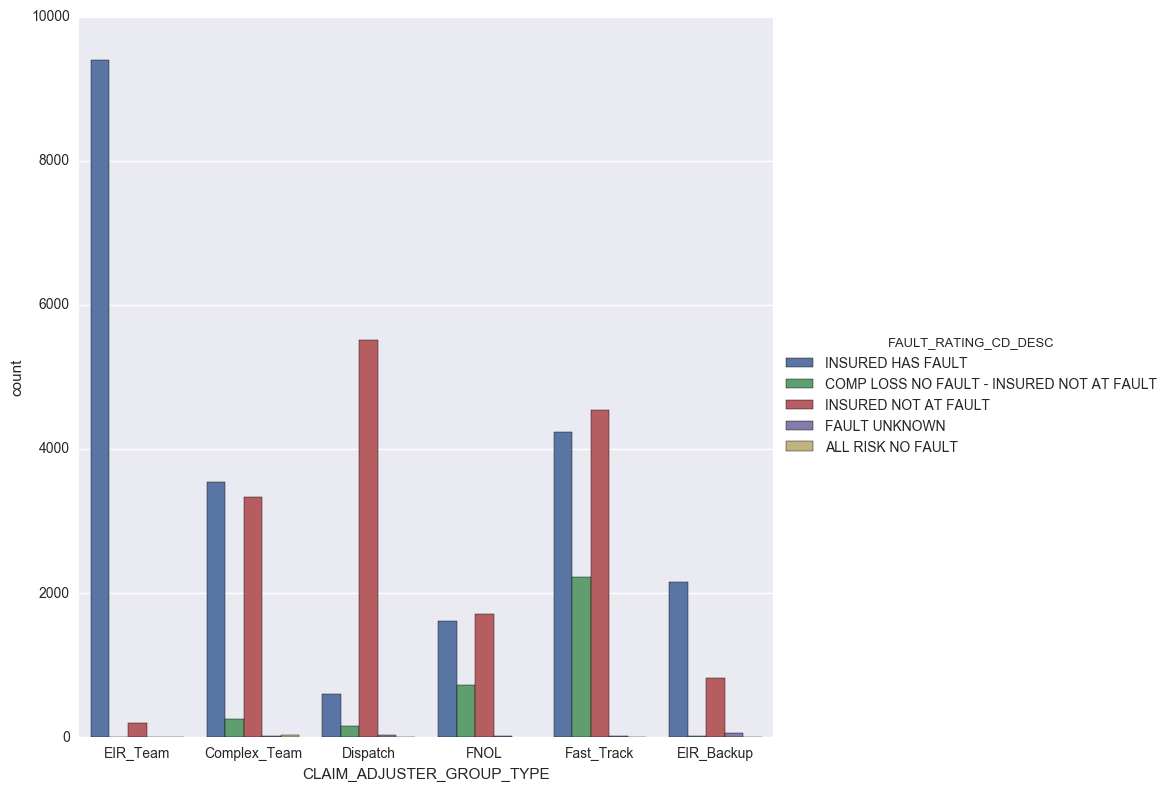

In [11]:
# Plot the fault rating code and claim adjuster group.
df_report = df_claims[df_claims['CLAIM_ADJUSTER_GROUP_TYPE'] != 'FNOL']

sns.factorplot('CLAIM_ADJUSTER_GROUP_TYPE',data=df_claims,hue='FAULT_RATING_CD_DESC' ,kind='count',size=8)

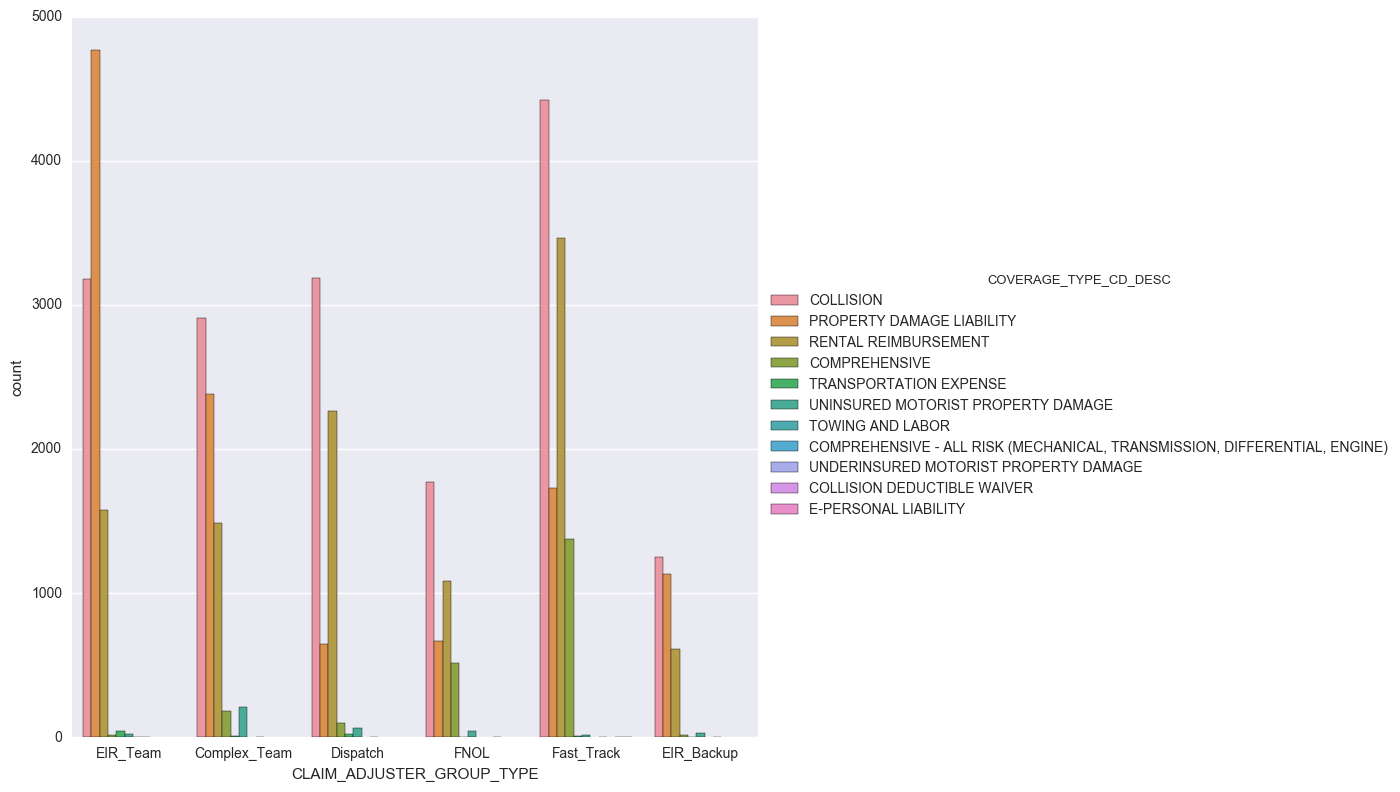

In [12]:
# Plot the coverage code and claim adjuster group.
df_report = df_claims[df_claims['CLAIM_ADJUSTER_GROUP_TYPE'] != 'FNOL']

sns.factorplot('CLAIM_ADJUSTER_GROUP_TYPE',data=df_claims,hue='COVERAGE_TYPE_CD_DESC' ,kind='count',size=8) 

In [13]:
# drop fields which are not useful - 
df_claims.drop(['DAMAGE_DESC', 'PROPERTY_DESC', 'CLAIM_TYPE_DESC','INCIDENT_TYPE_CD_DESC','TOTAL_LOSS_IND',
'NON_CHARGEABLE_CLAIM_IND', 'INCIDENT_ONLY_IND','LOSS_SUB_TYPE_DESC','CLAIM_FILE_TYPE_DESC','CLAIM_NUM','CLAIM_ADJUSTER_GROUP_TYPE','VEH_COUNT','LIABILITY_PERCENTAGE'],axis=1,inplace=True)


In [14]:
# Encode the nominal features - String to integers.
for col in df_claims.columns:
    if col in ['VEH_COUNT','LIABILITY_PERCENTAGE']:
        continue

    claim_labelEncode(df_claims,col)


In [15]:
# Impute the missing values in the dataframe.
claim_imp = claim_Imputer(df_claims)

In [16]:
# Convert to dataframe.
df_claim_imp = pd.DataFrame(data=claim_imp, columns=df_claims.columns)

In [17]:
# Standarize the features so the features are on same - scale.
# array_std =  claim_standardScaler(df_claim_imp[['LIABILITY_PERCENTAGE']])

# df_std = pd.DataFrame(data=array_std,columns=['LIABILITY_PERCENTAGE'])

# df_claim_imp.drop(['LIABILITY_PERCENTAGE'], inplace=True,axis=1)

# df_claim_std = pd.concat([df_claim_imp,df_std],axis=1)

df_claim_std = df_claim_imp
df_claim_std.head()

,codeCOVERAGE_NM,codeCOVERAGE_SUB_TYPE_CD_DESC,codeTOW_TYPE_CD_DESC,codeCOVERAGE_TYPE_CD_DESC,codeVEHICLE_TOW_STORAGE_IND,codeATTORNEY_ON_CLAIM_IND,codePRODUCT_TYPE_DESC,codeGLASS_ONLY_IND,codeLIABILITY_CD_DESC,codeCATASTROPHE_IND,...,codeCLAIM_TIER_CD_DESC,codeCLAIM_COMPLEXITY_CD_DESC,codeLOSS_TYPE_CD_DESC,codeCLAIM_JURISDICTION_ST_CD_DESC,codeWEATHER_CD_DESC,codeLEGAL_ENTITY_NM,codeACCIDENT_FAULT_IND,codeHIGH_VALUE_CLAIM_IND,codeFATALITY_IND,codeCASUALTY_UNIT_IND
0,1.0,0.0,4.0,0.0,0.0,0.0,7.0,0.0,2.0,0.0,...,3.0,0.0,13.0,5.0,3.0,4.0,1.0,0.0,0.0,0.0
1,5.0,5.0,4.0,5.0,0.0,0.0,7.0,0.0,1.0,0.0,...,3.0,0.0,6.0,5.0,3.0,4.0,1.0,0.0,0.0,0.0
2,6.0,6.0,4.0,6.0,0.0,0.0,7.0,0.0,1.0,0.0,...,3.0,0.0,6.0,5.0,3.0,4.0,1.0,0.0,0.0,0.0
3,1.0,0.0,4.0,0.0,0.0,0.0,7.0,0.0,1.0,0.0,...,3.0,0.0,6.0,5.0,3.0,4.0,1.0,0.0,0.0,0.0
4,5.0,5.0,4.0,5.0,0.0,0.0,7.0,0.0,2.0,0.0,...,3.0,0.0,3.0,5.0,3.0,4.0,1.0,0.0,0.0,0.0


In [18]:
# Create target dataframe. Set the fast track values to 1 and other groups to 0.
df_target.loc[df_target['CLAIM_ADJUSTER_GROUP_TYPE'] != 'Fast_Track', 'CLAIM_ADJUSTER_GROUP_TYPE'] = 0
df_target.loc[df_target['CLAIM_ADJUSTER_GROUP_TYPE'] == 'Fast_Track', 'CLAIM_ADJUSTER_GROUP_TYPE'] = 1
df_target.groupby('CLAIM_ADJUSTER_GROUP_TYPE').count()

/Users/suriya0404/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/suriya0404/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/Users/suriya0404/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,CLAIM_NUM
CLAIM_ADJUSTER_GROUP_TYPE,
0,30230
1,11022


codeCOVERAGE_NM 0.331209098166
codeCOVERAGE_SUB_TYPE_CD_DESC 0.327370191196
codeTOW_TYPE_CD_DESC 0.0959485247028
codeCOVERAGE_TYPE_CD_DESC 0.0522793420145
codeVEHICLE_TOW_STORAGE_IND 0.0403805989351
codeATTORNEY_ON_CLAIM_IND 0.0230235294703
codePRODUCT_TYPE_DESC 0.0218757064962
codeGLASS_ONLY_IND 0.0197326269393
codeLIABILITY_CD_DESC 0.0195813453945
codeCATASTROPHE_IND 0.0190738267597
codeFAULT_RATING_CD_DESC 0.0169520994386
codeCLAIM_TIER_CD_DESC 0.015668345993
codeCLAIM_COMPLEXITY_CD_DESC 0.00795882402374
codeLOSS_TYPE_CD_DESC 0.00601416281084
codeCLAIM_JURISDICTION_ST_CD_DESC 0.00192100447614
codeWEATHER_CD_DESC 0.000762143460823
codeLEGAL_ENTITY_NM 0.000248629722877
codeACCIDENT_FAULT_IND 0.0
codeHIGH_VALUE_CLAIM_IND 0.0
codeFATALITY_IND 0.0
codeCASUALTY_UNIT_IND 0.0


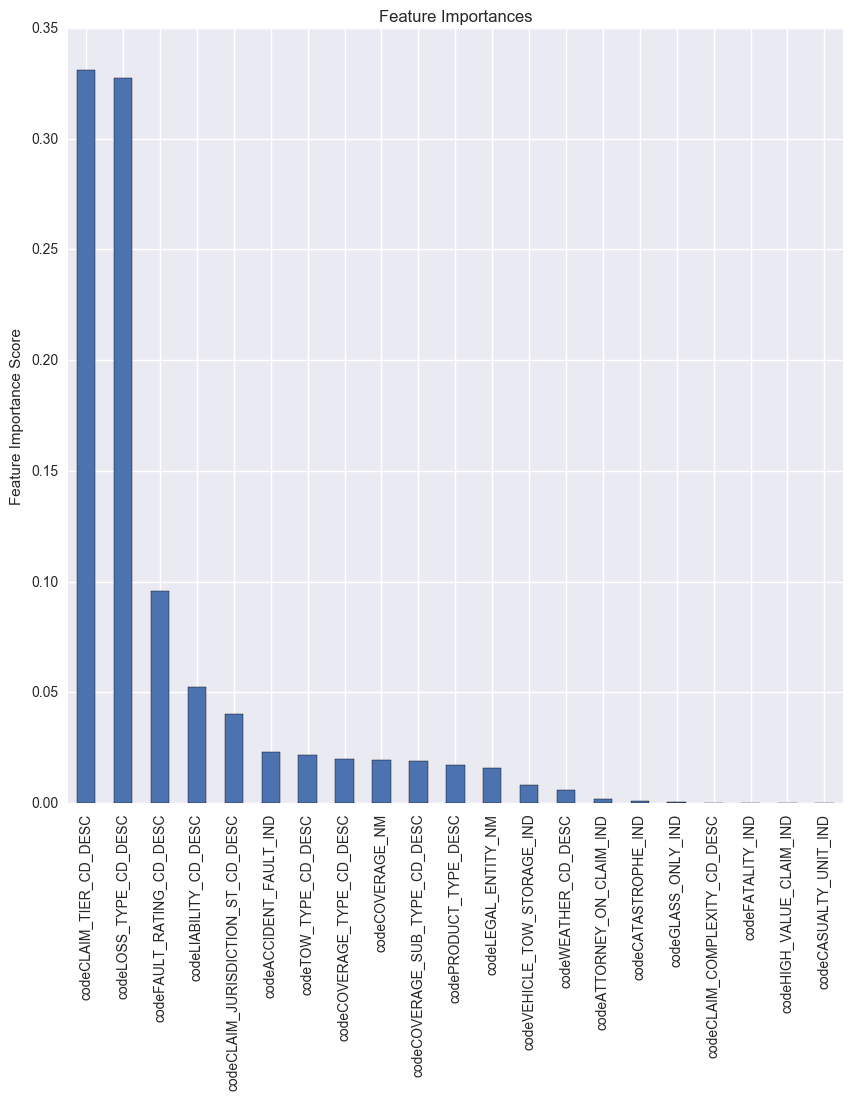

In [19]:
# Use the Random forest classifier to identify the variable importance.
forest = RandomForestClassifier(n_estimators=1000, random_state=0,n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(df_claim_std, list(df_target['CLAIM_ADJUSTER_GROUP_TYPE']),test_size=0.3,random_state=0)

labels = df_claim_std.columns
forest.fit(X_train,y_train)
importances = forest.feature_importances_
indices = np.argsort(importances) [::-1]

for f in range(X_train.shape[1]):
    print(labels[f], importances[indices[f]])
    
feat_imp = pd.Series(importances, labels).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Feature Importances',figsize=(10,10))
plt.ylabel('Feature Importance Score')

In [20]:
# first 23 fields needs to be hot-encoded.
ohe = OneHotEncoder(categorical_features=np.arange(0,21))
df_claim_hot = ohe.fit_transform(df_claim_std)

In [21]:
# Create data frame of hot-encoded array.
df_claim_mod = pd.DataFrame(df_claim_hot.toarray())

In [22]:
# Split the dataset to train and test dataset. 70% of data is trained and 30% of data is used for testing.
X_train, X_test, y_train, y_test = train_test_split(df_claim_mod, list(df_target['CLAIM_ADJUSTER_GROUP_TYPE']),test_size=0.3,random_state=0)

In [23]:
# Train the Logistic Regression model.
param_range = [0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09]

for param in param_range:
    print('C : ',param)
    lr = LogisticRegression(penalty='l2',C=param)
    lr.fit(X_train,y_train)
    print('training accuracy:', lr.score(X_train,y_train))
    print('test accuracy: ', lr.score(X_test, y_test))

C :  0.01
training accuracy: 0.773929907189
test accuracy:  0.766564318035
C :  0.02
training accuracy: 0.77746225239
test accuracy:  0.76979638009
C :  0.03
training accuracy: 0.780786812578
test accuracy:  0.773028442146
C :  0.04
training accuracy: 0.781098490096
test accuracy:  0.77383645766
C :  0.05
training accuracy: 0.781756475966
test accuracy:  0.77674531351
C :  0.06
training accuracy: 0.781860368472
test accuracy:  0.77674531351
C :  0.07
training accuracy: 0.781964260978
test accuracy:  0.776826115061
C :  0.08
training accuracy: 0.782033522649
test accuracy:  0.776826115061
C :  0.09
training accuracy: 0.782137415154
test accuracy:  0.776906916613


In [24]:
# Train the SVM model.
param_range = [0.0001,0.001,0.01,0.1,1.0,10.0,100.0,1000.0]


for param in param_range:
    svm = SVC(kernel ='sigmoid',C=param,random_state= 0)
    svm.fit(X_train,y_train)
    
    print('training accuracy:', svm.score(X_train,y_train))
    print('test accuracy: ', svm.score(X_test, y_test))

training accuracy: 0.735662834188
test accuracy:  0.72616354234
training accuracy: 0.735662834188
test accuracy:  0.72616354234
training accuracy: 0.735662834188
test accuracy:  0.72616354234
training accuracy: 0.749930738329
test accuracy:  0.739657401422
training accuracy: 0.768562127719
test accuracy:  0.75816095669
training accuracy: 0.774622523895
test accuracy:  0.76454427925
training accuracy: 0.730745255576
test accuracy:  0.727456367162
training accuracy: 0.739229810223
test accuracy:  0.735536522301


train_mean  [ 0.73991532  0.75495478  0.76608517  0.76765442  0.7687678   0.77042073
  0.77249038  0.77379864  0.7735933   0.77360988]
train_std  [ 0.00150115  0.00289429  0.00042232  0.00051272  0.00041475  0.00117043
  0.00090807  0.0008127   0.00053942  0.00042531]
test_mean  [ 0.75211247  0.76880529  0.77133337  0.77206079  0.77223383  0.77258009
  0.77271865  0.7729264   0.77271855  0.77303008]
test_std  [ 0.00422554  0.00541723  0.0054412   0.00495734  0.00541199  0.00470505
  0.00489368  0.00470259  0.00455039  0.00455052]


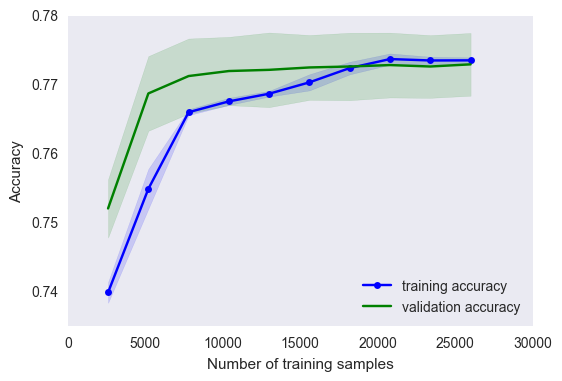

In [25]:
# Plot the training Curve
pipe_lr = Pipeline([('clf',LogisticRegression(penalty='l2',random_state=0,C=0.01))])

train_sizes,train_scores,test_scores =     learning_curve(estimator=pipe_lr,
                  X=X_train,
                  y=y_train,
                  train_sizes=np.linspace(0.1,1.0,10),
                  cv=10,
                  n_jobs=1 
                  )

# for x,y,z in zip(train_sizes,train_scores,test_scores):
#     print('train size ', x)
#     print('train scores ',y)
#     print('test scores ', z)


train_mean = np.mean(train_scores,axis=1)
train_std = np.std(train_scores,axis=1)
test_mean = np.mean(test_scores,axis=1)
test_std = np.std(test_scores,axis=1)

print('train_mean ', train_mean)
print('train_std ', train_std)
print('test_mean ', test_mean)
print('test_std ', test_std)

plt.plot(train_sizes,train_mean,color='blue',marker='o',markersize=5,label='training accuracy')

plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes,test_mean,color='green',marker='x',markersize=5,label='validation accuracy')

plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
# plt.ylim([0.8,1.0])
plt.show()

In [26]:
# confusion matrix

y_predict = lr.predict(X_test)

confusion_matrix(y_test, y_predict)

#print ("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_predict))
#print ("AUC Score (Train): %f" % metrics.roc_auc_score(y_test, y_predict))

#cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Disbursed'], cv=cv_folds, scoring='roc_auc')
# print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))

array([[8103,  884],
       [1877, 1512]])

In [27]:
# Gradient boosting classifier.
param_test = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=50,
              min_samples_split=500, min_weight_fraction_leaf=0.0,
              n_estimators=100, presort='auto', random_state=10,
              subsample=0.8, verbose=0, warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': range(20, 81, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='roc_auc', verbose=0)

In [28]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

/Users/suriya0404/anaconda/lib/python3.5/site-packages/sklearn/model_selection/_search.py:667: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


([mean: 0.84697, std: 0.00728, params: {'n_estimators': 20},
  mean: 0.84918, std: 0.00776, params: {'n_estimators': 30},
  mean: 0.85005, std: 0.00813, params: {'n_estimators': 40},
  mean: 0.85093, std: 0.00823, params: {'n_estimators': 50},
  mean: 0.85120, std: 0.00795, params: {'n_estimators': 60},
  mean: 0.85174, std: 0.00808, params: {'n_estimators': 70},
  mean: 0.85182, std: 0.00810, params: {'n_estimators': 80}],
 {'n_estimators': 80},
 0.85181943328741738)

In [29]:
y_predict = gsearch1.predict(X_test)

confusion_matrix(y_test, y_predict)


array([[7591, 1396],
       [1233, 2156]])

In [30]:
print('training accuracy:', gsearch1.score(X_train,y_train))
print('test accuracy: ', gsearch1.score(X_test, y_test))

training accuracy: 0.855687454544
test accuracy:  0.851057343477


In [31]:
import theano
from theano import tensor

from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.utils.np_utils import to_categorical

y_binary = to_categorical(y_train)

np.random.seed(1) 

model = Sequential()
model.add(Dense(input_dim=X_train.shape[1], 
                output_dim=50, 
                init='uniform', 
                activation='tanh'))

model.add(Dense(input_dim=50, 
                output_dim=50, 
                init='uniform', 
                activation='tanh'))

model.add(Dense(input_dim=50, 
                output_dim=pd.DataFrame(y_train).shape[1], 
                init='uniform', 
                activation='softmax'))

sgd = SGD(lr=0.001, decay=1e-7, momentum=.9)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=["accuracy"])

model.fit(X_train, pd.DataFrame(y_binary), 
          nb_epoch=50, 
          batch_size=300, 
          verbose=1, 
          validation_split=0.1)

ImportError: No module named 'theano'

In [45]:
pd.DataFrame(y_train).shape

(28876, 1)

In [48]:
y_train

[1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
